In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
k=df['math score']
k.columns

AttributeError: 'Series' object has no attribute 'columns'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print(f"Categories in Gender column {df['gender'].unique()}")
print(f"Categories in race/ethnicity column {df['race/ethnicity'].unique()}")
print(f"Categories in parental level of education column {df['parental level of education'].unique()}")
print(f"Categories in lunch column {df['lunch'].unique()}")
print(f"Categories in test preparation course column {df['test preparation course'].unique()}")
# print(f"Categories in Gender column {df['gender'].unique()}")


Categories in Gender column ['female' 'male']
Categories in race/ethnicity column ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education column ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column ['standard' 'free/reduced']
Categories in test preparation course column ['none' 'completed']


In [16]:
df['lunch'].dtype

dtype('O')

In [18]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

In [19]:
print(f"numerical_features:{numerical_features}")
print(f"Categorical_features:{categorical_features}")

numerical_features:['math score', 'reading score', 'writing score']
Categorical_features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [20]:
df['total_score']=df['math score']+df['reading score']+df["writing score"]
df['avg_score']=(df['math score']+df['reading score']+df["writing score"])/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


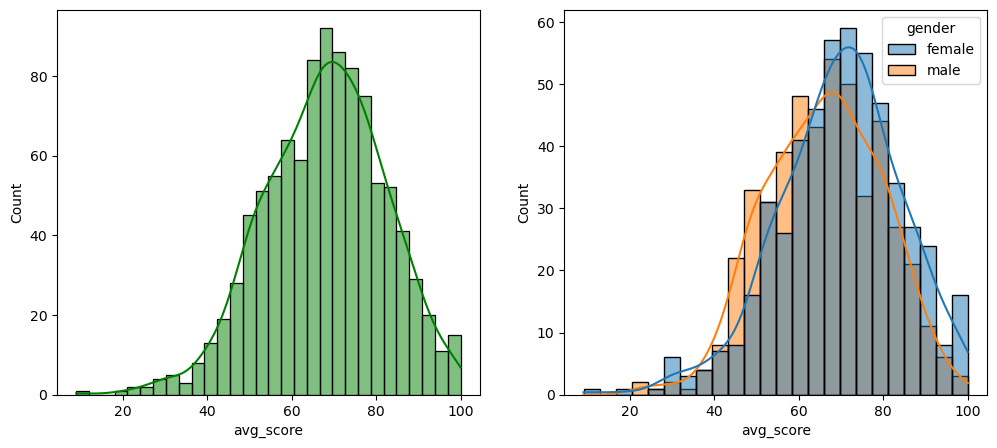

In [24]:
#Kernel Distribution function

fig,axs=plt.subplots(ncols=2,nrows=1,figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df,x="avg_score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="avg_score",kde=True,hue='gender')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,Ridge,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'catboost'

In [3]:
!pip install catboost

In [6]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [7]:
df=pd.read_csv("StudentsPerformance.csv")

In [8]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
x=df.drop(['math score'],axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [10]:
y=df[['math score']]

In [11]:
y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [12]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer ## like pipeline

num_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
[
    ("OneHotEncoder", oh_transformer,cat_features),
    ("StandardScaler", num_transformer,num_features)
])

In [13]:
x=preprocessor.fit_transform(x)

In [14]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.05694554,  0.45733301],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.94779033,  0.98406266],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.35894946,  1.18158627],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49126664, -0.99117351],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.45063795, -0.99117351],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.4960025 ,  1.37910989]])

In [17]:
y_train

,math score
29,62
535,66
695,79
557,61
836,73
...,...
106,87
270,69
860,53
435,50


In [18]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mse,mae,rmse,r2_square

In [24]:
x_train.shape

(800, 19)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
models={
    "Linear Regression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "DecisionTree Regressor":DecisionTreeRegressor(),
    "RandomForest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "KNeighbors Regressor":KNeighborsRegressor()
}

model_list=[]
r2_list=[]
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    mse_train,mae_train,rmse_train,r2_square_train=evaluate_model(y_train,y_train_pred)    
    mse_test,mae_test,rmse_test,r2_square_test=evaluate_model(y_test,y_test_pred)
    adj_r2_square_train=(1-(((1-r2_square_train)*(len(x_train)-1))/(len(x_train)-x_train.shape[1]-1)))
    adj_r2_square_test=(1-(((1-r2_square_test)*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1)))
    
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set")
    print(f"RMSE: {rmse_train}")
    print(f"MSE: {mse_train}")
    print(f"MAE: {mae_train}")
    print(f"r2_square_train : {r2_square_train}")
    print(f"adj_r2_square: {adj_r2_square_train}")
    
    
    print("Model performance for testing set")
    print(f"RMSE: {rmse_test}")
    print(f"MSE: {mse_test}")
    print(f"MAE: {mae_test}")
    print(f"r2_square : {r2_square_test}")
    print(f"adj_r2_square : {adj_r2_square_test}")
    
    print("="*35)

Linear Regression
Model performance for training set
RMSE: 5.323050852720514
MSE: 28.33487038064859
MAE: 4.266711846071957
r2_square_train : 0.8743172040139593
adj_r2_square: 0.8712557000091712
Model performance for testing set
RMSE: 5.393993869732845
MSE: 29.095169866715516
MAE: 4.214763142474852
r2_square : 0.8804332983749564
adj_r2_square : 0.8678123687589796
lasso
Model performance for training set
RMSE: 6.593815587795566
MSE: 43.47840400585579
MAE: 5.206302661246526
r2_square_train : 0.8071462015863456
adj_r2_square: 0.8024484808557566
Model performance for testing set
RMSE: 6.519694535667421
MSE: 42.506416838411624
MAE: 5.157881810347763
r2_square : 0.8253197323627852
adj_r2_square : 0.8068812596677459
ridge
Model performance for training set
RMSE: 5.323324922741654
MSE: 28.33778823308244
MAE: 4.264987823725982
r2_square_train : 0.8743042615212909
adj_r2_square: 0.8712424422506557
Model performance for testing set
RMSE: 5.390387016935638
MSE: 29.056272192348292
MAE: 4.21110068801